<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419 <font color='green'>&rarr; current model: 0.71<font>
    - **ROC AUC**  = 0.6150 <font color='green'>&rarr; current model: 0.75<font>
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

- <font color='green'>Is a first time donor likely to donate blood again?<font>
- <font color='green'>Is a donor likely to donate again after a long period without making any donations?<font>
- <font color='green'>What is the size of the period after which donors are less likely to donate blood again?<font>

## Actual Question
Choose the **one** question that should be answered.

- <font color='green'>Has the person donated blood in March 2007?<font>

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:

    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

    Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008

- **Feature Information**:
    - **Recency (R)**: months since last donation
    - **Frequency (F)**: total number of donation
    - **Monetary (M)**: total blood donated in c.c. ($cm^3$)
    - **Time (T)**): months since first donation
    - a binary variable representing whether the person donated blood in March 2007 (1: donated blood; 0: did not donate blood).
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [116]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

Dataset download:
* [Blood Transfusion Service Center Data Set](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)

In [117]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import auc, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

%matplotlib inline

In [118]:
plt.style.use('ggplot')

In [119]:
# Check library version 
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)
print('Seaborn: ', sns.__version__)

Numpy:  1.23.3
Pandas:  1.4.4
Seaborn:  0.12.1


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [120]:
# Read data in pandas
df = pd.read_csv('../../DATA/transfusion.data')

In [121]:
# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [122]:
# Rename column names
df.columns = ['recency', 'frequency', 'monetary', 'time', 'donated_march_2007']
df.head()

,recency,frequency,monetary,time,donated_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [123]:
## Perform EDA by investigating each of the points above

In [124]:
# Check data dimension
df.shape

(748, 5)

In [125]:
# Summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   recency             748 non-null    int64
 1   frequency           748 non-null    int64
 2   monetary            748 non-null    int64
 3   time                748 non-null    int64
 4   donated_march_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [126]:
# Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
donated_march_2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [127]:
# Missing values
df.isna().sum()

recency               0
frequency             0
monetary              0
time                  0
donated_march_2007    0
dtype: int64

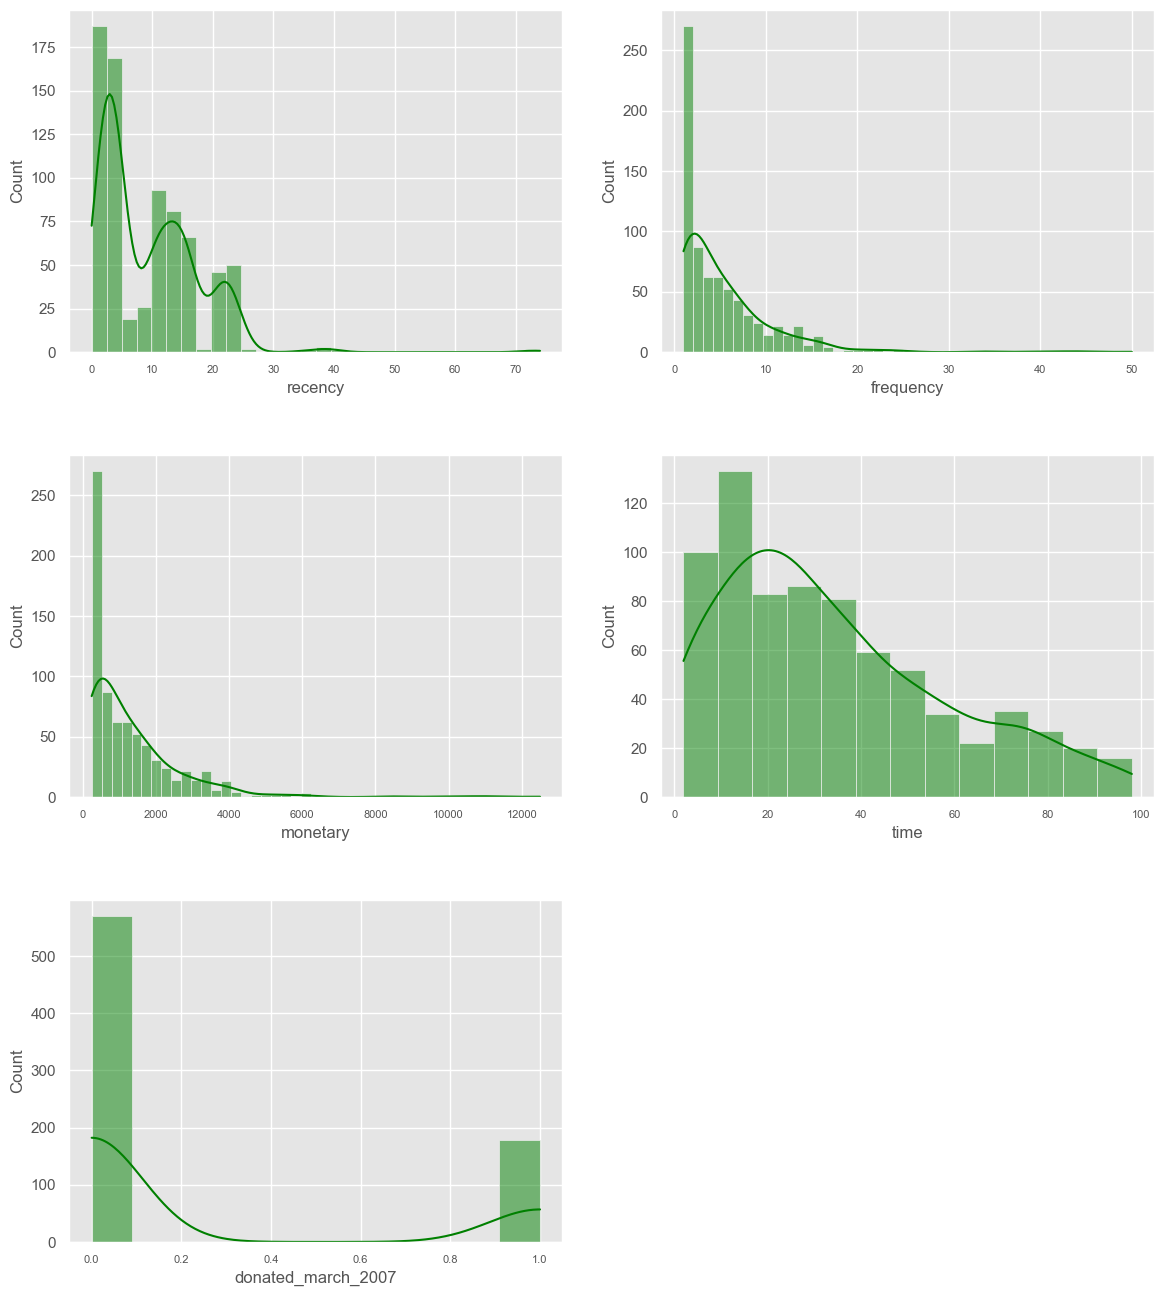

In [128]:
# Histograms: Plot feature distributions

# Features to plot
columns = df.columns

# Creating subplot axes
fig, axes = plt.subplots(3, 2, figsize=(14,16), sharey=False)
axes[2,1].set_axis_off()

# Iterating through axes and columns
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, kde=True, data=df, color='green', ax=ax)
    ax.tick_params(axis='x', labelsize=8)
    plt.subplots_adjust(hspace=0.3);

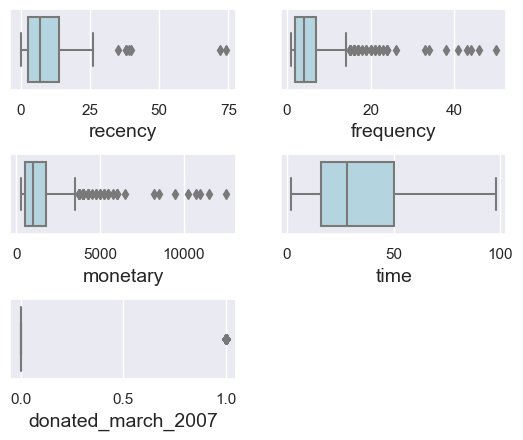

In [129]:
# Plot boxplot for each feature w/ separate y-axis to visualize outliers

for i, col in enumerate(df.columns):
    sns.set()
    plt.subplot(3, 2, i+1) # nrows, ncols, index
    sns.boxplot(x=col, data=df, color='lightblue')
    plt.xlabel(f'{col}', fontsize=14)
    plt.subplots_adjust(hspace=0.8)

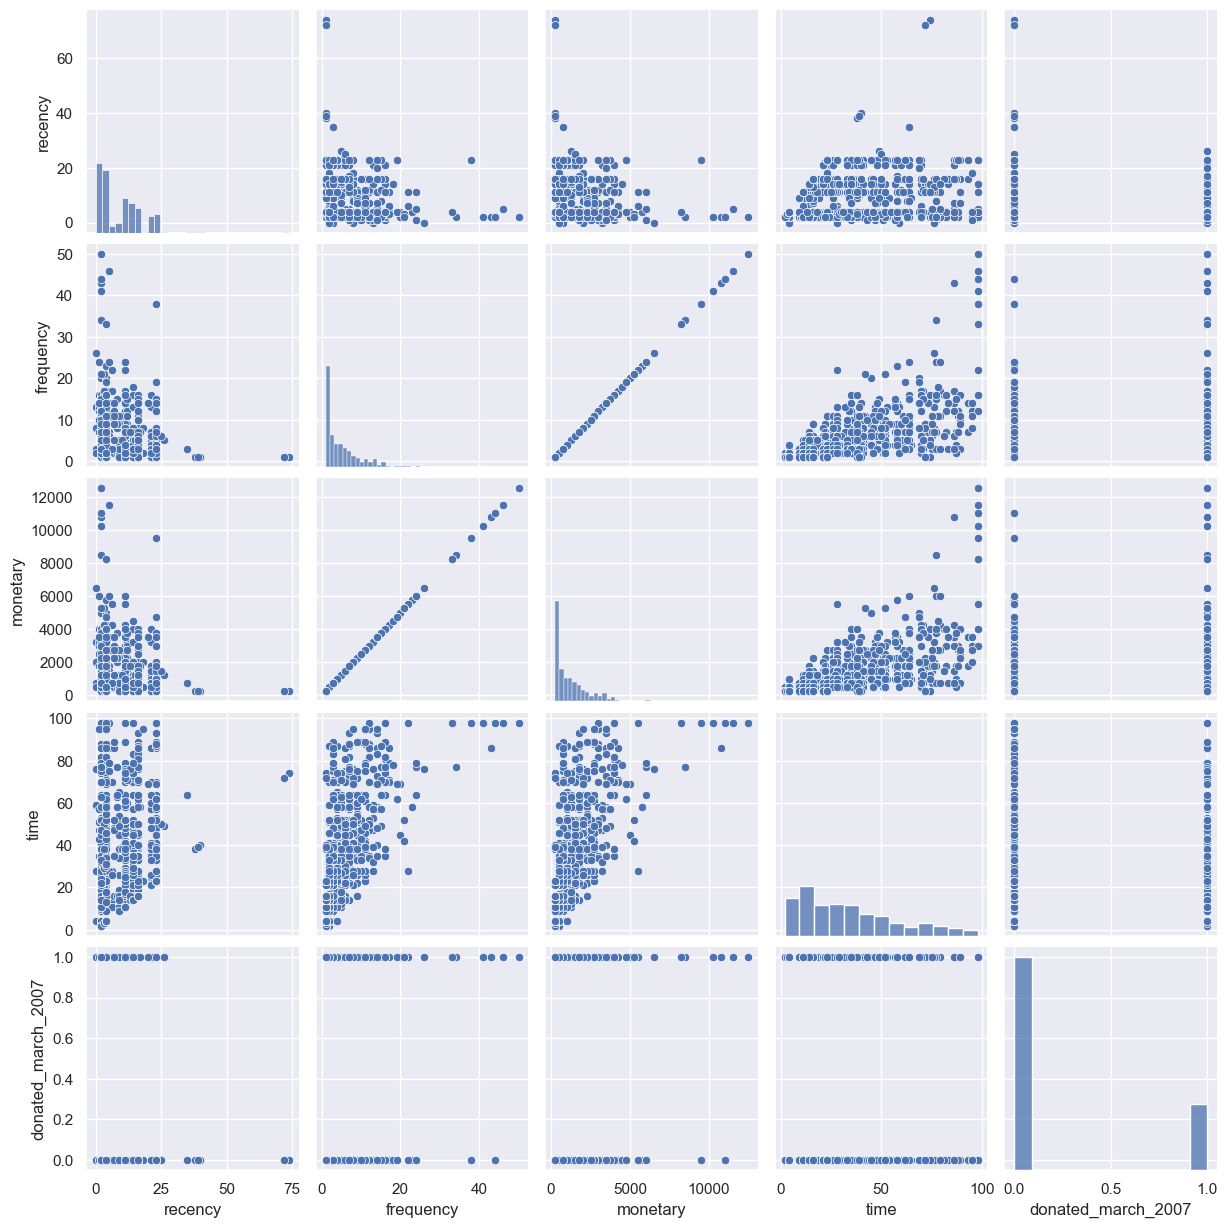

In [130]:
# Pairwise relationship
sns.pairplot(df);

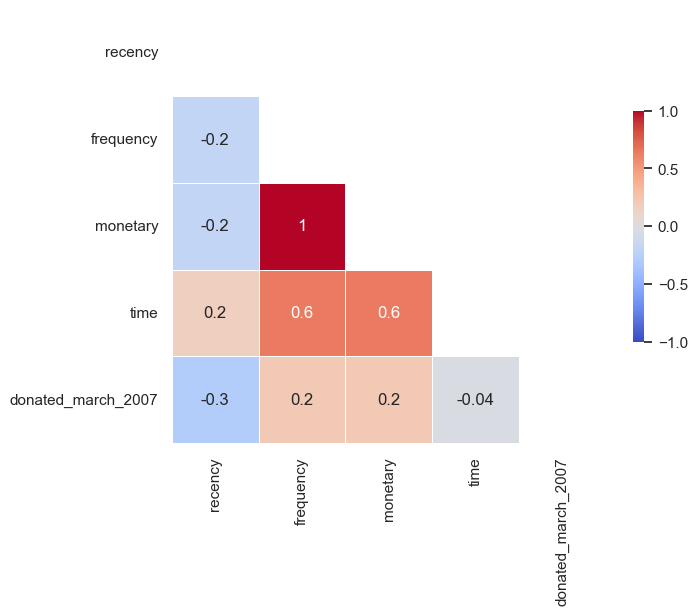

In [17]:
# Correlation heatmap
sns.set_theme(style="white")
plt.subplots(figsize=(7,6))

# Generate mask for upper triangle
mask = np.zeros_like(df.corr(), dtype=bool) #generate mask of "0's"
mask[np.triu_indices_from(mask)] = True #return upper triangle
# Set diverging colormap
cmap = sns.color_palette('coolwarm', as_cmap=True)
# Draw heatmap with mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, fmt='.1g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

**Documentation**
* no missing values
* recency, frequency and monetary show plenty of outliers
* monetary is highly correlated with frequency and will be excluded for modelling 

In [18]:
plt.style.use('ggplot')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [19]:
## Filter/subset/clean the data according to your EDA findings

**No action required here**

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
    - <font color='green'>recency, frequency, time</font>
- Is there an output variable (label)?
    - <font color='green'>yes</font>
- If there is an output variable:
    - What is it?
        - <font color='green'>donated_march_2007</font>
    - What is its type?
        - <font color='green'>object</font>
- What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [20]:
# Define features
features = ['recency','frequency','time']
X = df[features]

# Using a list comprehension
# X = [c for c in df.columns if not (c == 'donated_march_2007' or c == 'monetary')]

In [21]:
# Define target
y = df['donated_march_2007']

In [22]:
X.shape, y.shape

((748, 3), (748,))

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [23]:
# Split your data
train_size = 500
test_size = X.shape[0] - train_size 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    test_size=test_size,
                                                    stratify=y)

In [24]:
print(f'train size: {train_size}')
print(f'test size: {test_size}')
print(f'test ratio: {test_size/X.shape[0]:.2f}')

train size: 500
test size: 248
test ratio: 0.33


In [25]:
y_train.value_counts(normalize=True)

0    0.762
1    0.238
Name: donated_march_2007, dtype: float64

In [26]:
y_test.value_counts(normalize=True)

0    0.762097
1    0.237903
Name: donated_march_2007, dtype: float64

**Target variable y shows equal proportions of 0 and 1 in train and test after data split due to setting argument `stratify` to yes**

**Note! Normalization is not required for decision tree-based models**

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

**Use GridSearchCV to determine hyperparameters**

In [27]:
%%time

## Perform cross-validation with GridSearchCV
n_estimators = 10, 50, 100
max_depth = 3, 4, 5

# Perform cross-validation with GridSearchCV
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth}

rfc = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(rfc, param_grid, cv=10) 
rfc_cv.fit(X, y)

Wall time: 6.12 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (3, 4, 5), 'n_estimators': (10, 50, 100)})

In [28]:
print(f"Best Score: {rfc_cv.best_score_:.2f}")
print(f"Best Parameters: {rfc_cv.best_params_}")

Best Score: 0.76
Best Parameters: {'max_depth': 3, 'n_estimators': 10}


**Imbalanced Data: Random Forest With Bootstrap Class Weighting**

Given that each decision tree is constructed from a bootstrap sample (e.g. random selection with replacement), the class distribution in the data sample will be different for each tree. Therefore change the **class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset**. This can be achieved by setting the `class_weight` argument to the value `'balanced_subsample'`.

In [29]:
## Choose a model or models

# Model w/o adjustments
model1 = RandomForestClassifier(random_state=42)

# Model w/ parameter adjustment
model2 = RandomForestClassifier(n_estimators=10,
                                max_depth=3,
                                class_weight='balanced_subsample', # set class weight parameter to address imbalanced data issue
                                random_state=42)

# Step 9: Fit the Model

In [30]:
# Fit model 1
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
X_train.columns

Index(['recency', 'frequency', 'time'], dtype='object')

In [32]:
model1.feature_importances_

array([0.25597686, 0.30959333, 0.43442981])

The higher the value for feature importance, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**

In [33]:
list(zip(model1.feature_importances_, X_train.columns))

[(0.25597686182560014, 'recency'),
 (0.3095933278083139, 'frequency'),
 (0.43442981036608597, 'time')]

In [34]:
# Fit model 2
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       n_estimators=10, random_state=42)

In [35]:
model2.feature_importances_

array([0.39306686, 0.35390454, 0.2530286 ])

The higher the value for feature importance, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the **Gini importance**

In [36]:
list(zip(model2.feature_importances_, X_train.columns))

[(0.393066856817483, 'recency'),
 (0.35390454052421677, 'frequency'),
 (0.2530286026583003, 'time')]

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

## Define plotting functions

In [79]:
def plot_matrix_labels(y_test, y_pred):
    """
    Function to plot confusion matrix template with labels
    'True Neg','False Pos','False Neg','True Pos'
    """  
    cf = confusion_matrix(y_test, y_pred)
    labels = ['True Neg','False Pos','False Neg','True Pos']
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

In [80]:
def plot_confusion_matrix_with_labels(y_test, y_pred):
    """
    Function to plot confusion matrix with labels
    'True Neg','False Pos','False Neg','True Pos'
    """  
    cf = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cf, annot=labels, cmap=plt.cm.Blues, fmt="")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label');    

In [81]:
def plot_confusion_matrix(y_test, y_pred):
    """
    Function to plot confusion matrix
    """  
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion, annot=True, cmap=plt.cm.Blues, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label');    

In [82]:
def plot_precision_recall(model, X_test, y_test):
    """
    Function to plot precision-recall-curve
    """  
    # Generate prediction probabilities for each of the test observations using predict_proba() function
    m = model
    y_test_prob = m.predict_proba(X_test)[:,1]
    
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)

    # Plot Precision-Recall-curve
    fig, ax = plt.subplots(figsize=(5,4))
    step_kwargs = {'step': 'post'}
    ax.step(recall, precision, color='b', alpha=0.2, where='post')
    ax.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([0.0, 1.0])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title('2-class Precision-Recall curve')

In [83]:
def plot_roc_curve(model, X_test, y_test):
    """
    Function to plot roc curve
    """
    # Generate prediction probabilities for each of the test observations using predict_proba() function
    m = model
    y_test_prob = m.predict_proba(X_test)[:,1]
    
    # Store the false positive rate (fpr), true positive rate (tpr) in vectors for use in the graph
    fpr, tpr, _ = roc_curve(y_test, y_test_prob) #_: threshold
    
    # Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
    roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve
    plt.figure(figsize=(5,4))
    lw = 2 # line width
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc = "lower right");    

In [84]:
## Answer sheet function

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples\n')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right');

In [85]:
# Evaluate model against training set
model1.score(X_train, y_train), model2.score(X_train, y_train)

(0.944, 0.724)

In [86]:
# Evaluate model against testing set
model1.score(X_test, y_test), model2.score(X_test, y_test)

(0.7580645161290323, 0.7096774193548387)

**Model 1 is over-fitted. Continue with model 2 only**

In [87]:
# Predict on X_train
y_pred = model2.predict(X_train)

In [88]:
# Confusion matrix
confusion_matrix(y_train, y_pred)

array([[279, 102],
       [ 36,  83]], dtype=int64)

In [89]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [90]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       381
           1       0.45      0.70      0.55       119

    accuracy                           0.72       500
   macro avg       0.67      0.71      0.67       500
weighted avg       0.78      0.72      0.74       500



In [91]:
# Precision
precision_score(y_train, y_pred)

0.4486486486486487

In [92]:
# Recall
recall_score(y_train, y_pred)

0.6974789915966386

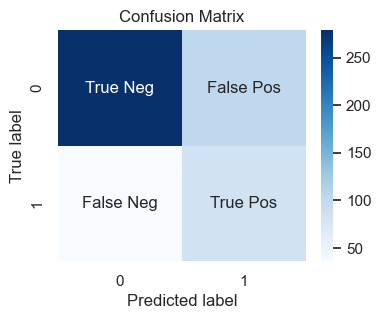

In [93]:
plot_matrix_labels(y_train, y_pred)

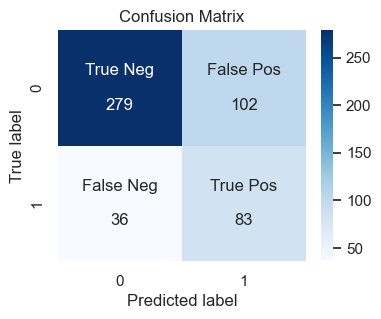

In [94]:
plot_confusion_matrix_with_labels(y_train, y_pred)

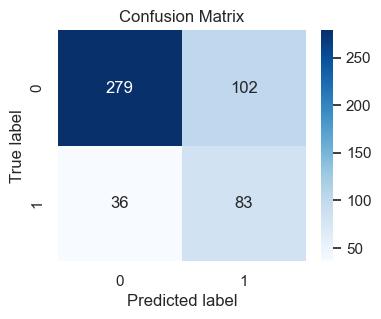

In [95]:
# Plot confusion matrix
plot_confusion_matrix(y_train, y_pred)

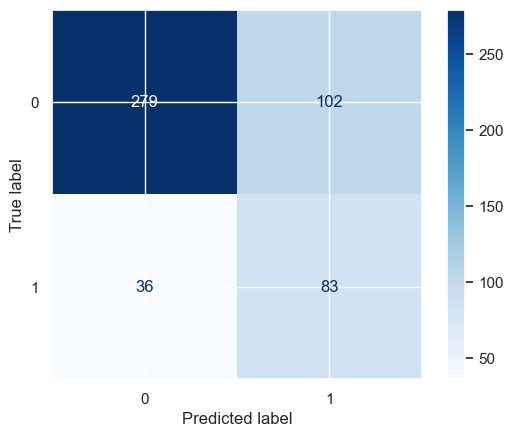

In [96]:
# Plot confusion matrix using sklearn function
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, cmap=plt.cm.Blues);

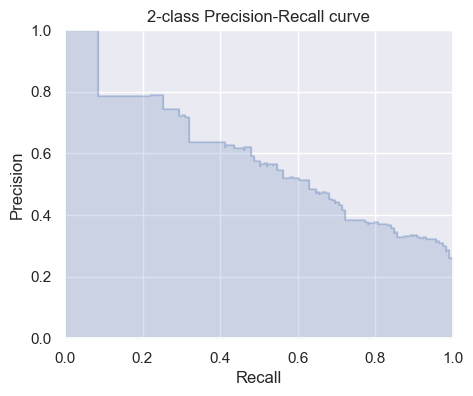

In [97]:
# Plot Precision-Recall curve for training set
plot_precision_recall(model2, X_train, y_train)

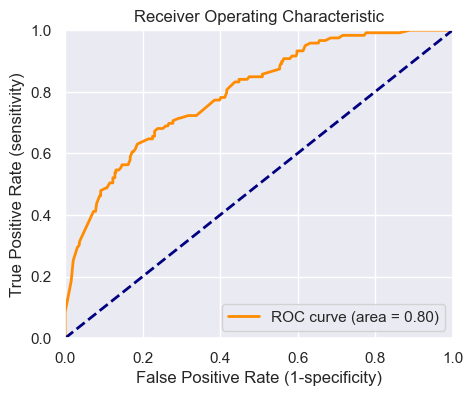

In [98]:
# Plot ROC curve for training set
plot_roc_curve(model2, X_train, y_train)   

In [99]:
## Use function from answer sheet
y_train_prob = model2.predict_proba(X_train)[:,1]

Accuracy : 0.7240 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.4486 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.6975 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7959                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples



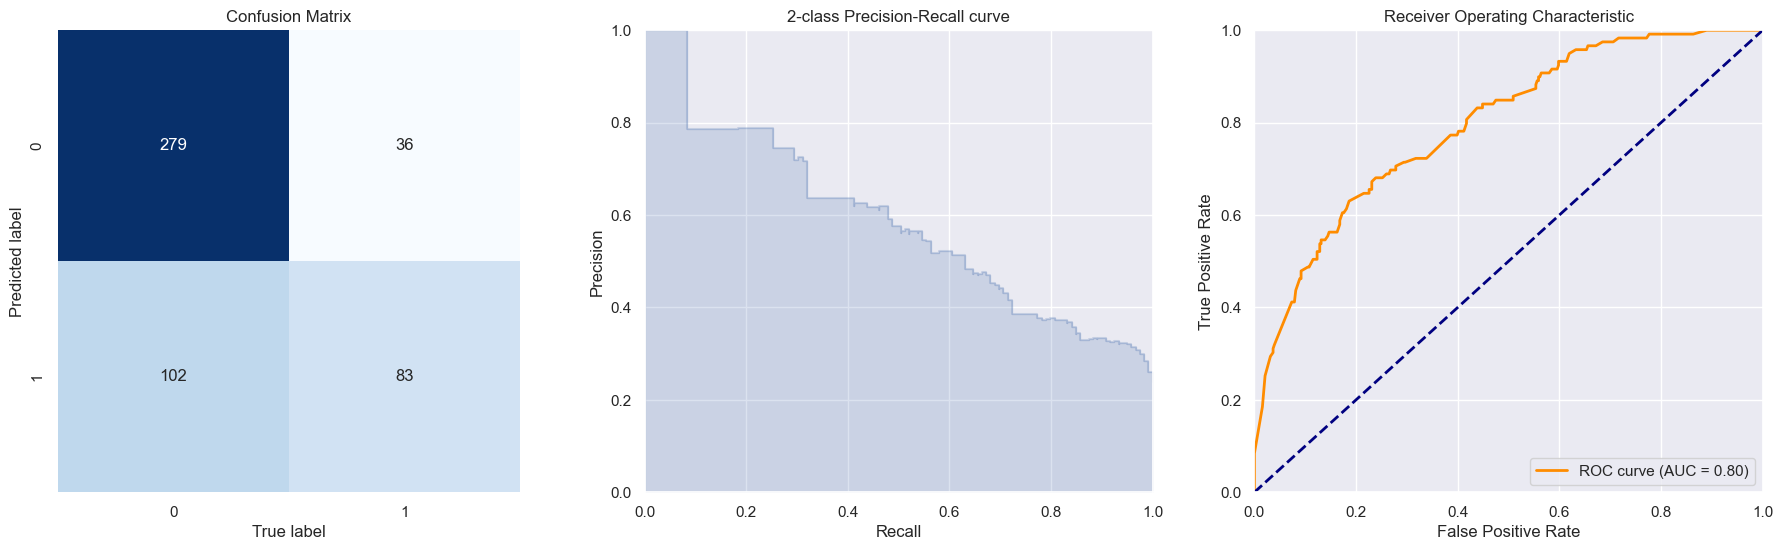

In [100]:
show_summary_report(y_train, y_train_prob)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [101]:
## Evaluate model against test set

In [102]:
# Accuracy score
model2.score(X_test, y_test)

0.7096774193548387

In [103]:
# Predict on X_test
y_pred = model2.predict(X_test)

In [104]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[136,  53],
       [ 19,  40]], dtype=int64)

In [105]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


FN: type 2 error (important for health setting)

FP: type 1 error (important for financial setting)

In [106]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       189
           1       0.43      0.68      0.53        59

    accuracy                           0.71       248
   macro avg       0.65      0.70      0.66       248
weighted avg       0.77      0.71      0.73       248



In [107]:
# Precision
precision_score(y_test, y_pred)

0.43010752688172044

In [108]:
# Recall
recall_score(y_test, y_pred)

0.6779661016949152

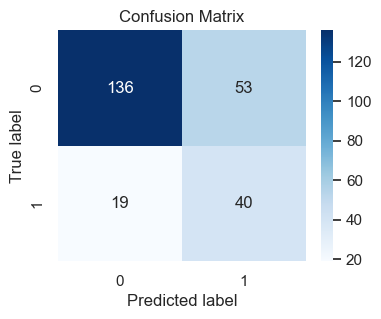

In [109]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

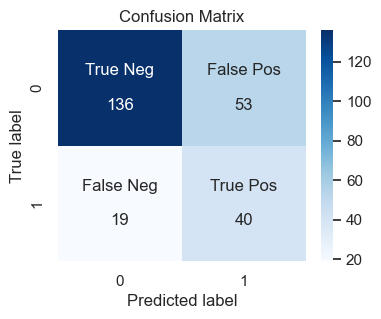

In [110]:
plot_confusion_matrix_with_labels(y_test, y_pred)

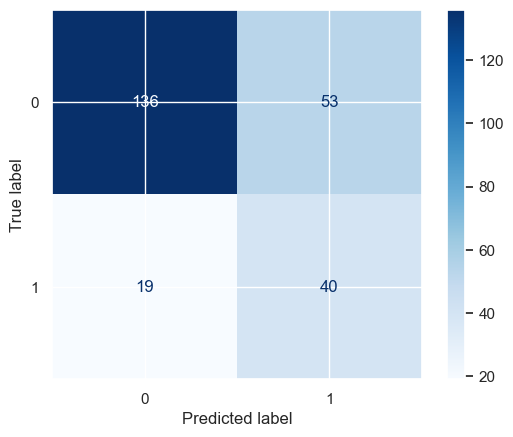

In [111]:
# Plot confusion matrix using sklearn function
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues);

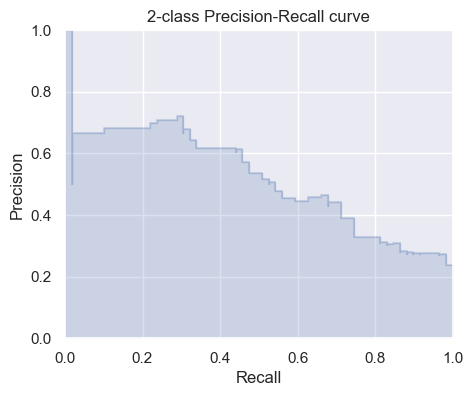

In [112]:
# Plot Precision-Recall curve for testing set
plot_precision_recall(model2, X_test, y_test)

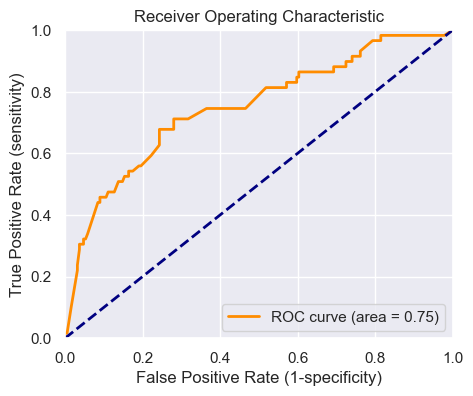

In [113]:
# Plot ROC curve for testing set
plot_roc_curve(model2, X_test, y_test)   

In [114]:
## Use function from answer sheet
y_test_prob = model2.predict_proba(X_test)[:,1]

Accuracy : 0.7097 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.4301 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.6780 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7498                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples



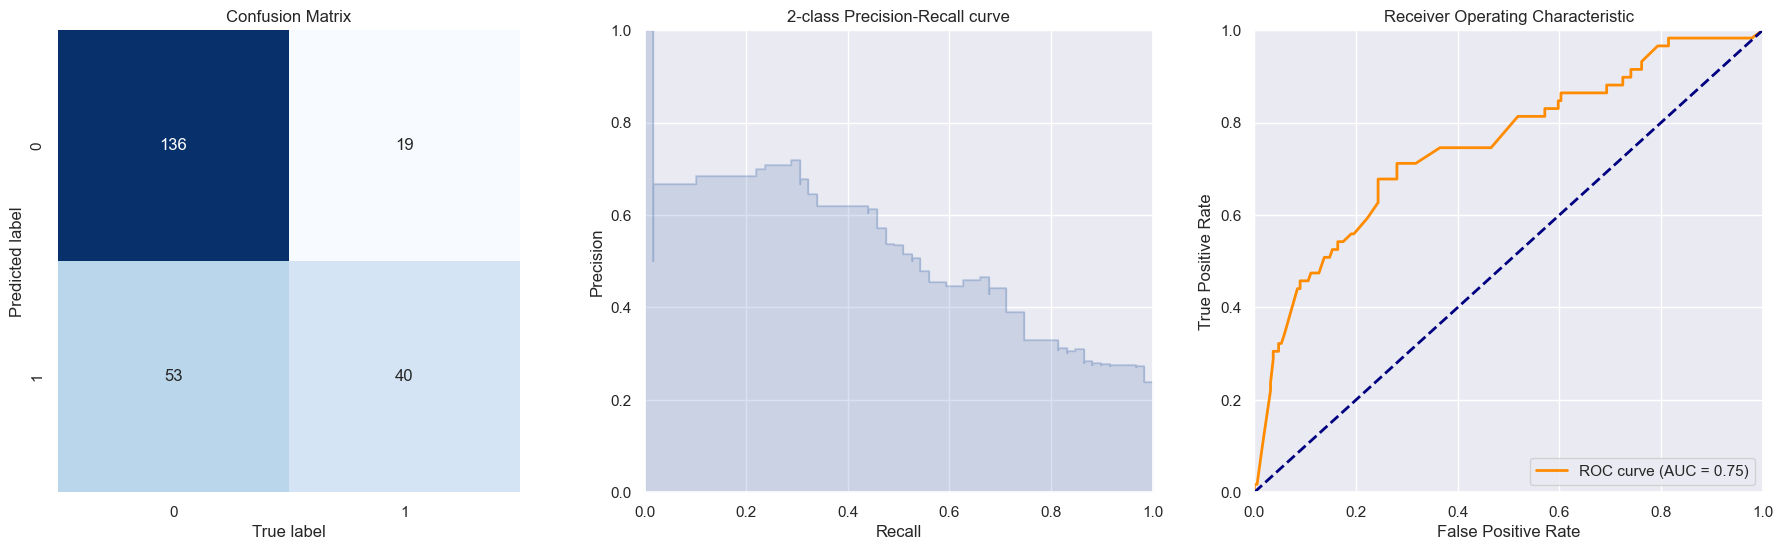

In [115]:
show_summary_report(y_test, y_test_prob)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

Answer: Model can be used to predict if a person made a blood donation in March 2007



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



